<a href="https://colab.research.google.com/github/eternaldemon/Deep-Learning/blob/master/Fashion_MNIST_Image_Classification_using_TF_2_2_%26_Keras_2_3_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning 1st Notebook.

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)
import matplotlib.pyplot as plt


dataset=tf.keras.datasets.fashion_mnist

(train_images, train_labels),(test_images, test_labels) = dataset.load_data()


2.2.0
2.3.0-tf
4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images.shape #60000 images and each image is 28x28 pixels


(60000, 28, 28)

In [ ]:
train_labels.shape
#60000 labels since there are 60000 images

(60000,)

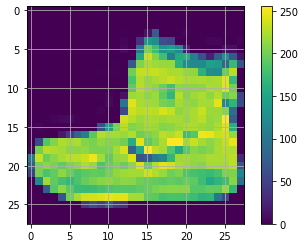

In [ ]:
plt.figure()
plt.imshow(train_images[0]) #shows a image without plotting
#plt.show() is for showing data that has been plotted before using this command.
plt.colorbar()
plt.grid(True) #shows/removes the grid accordingly
plt.show()


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


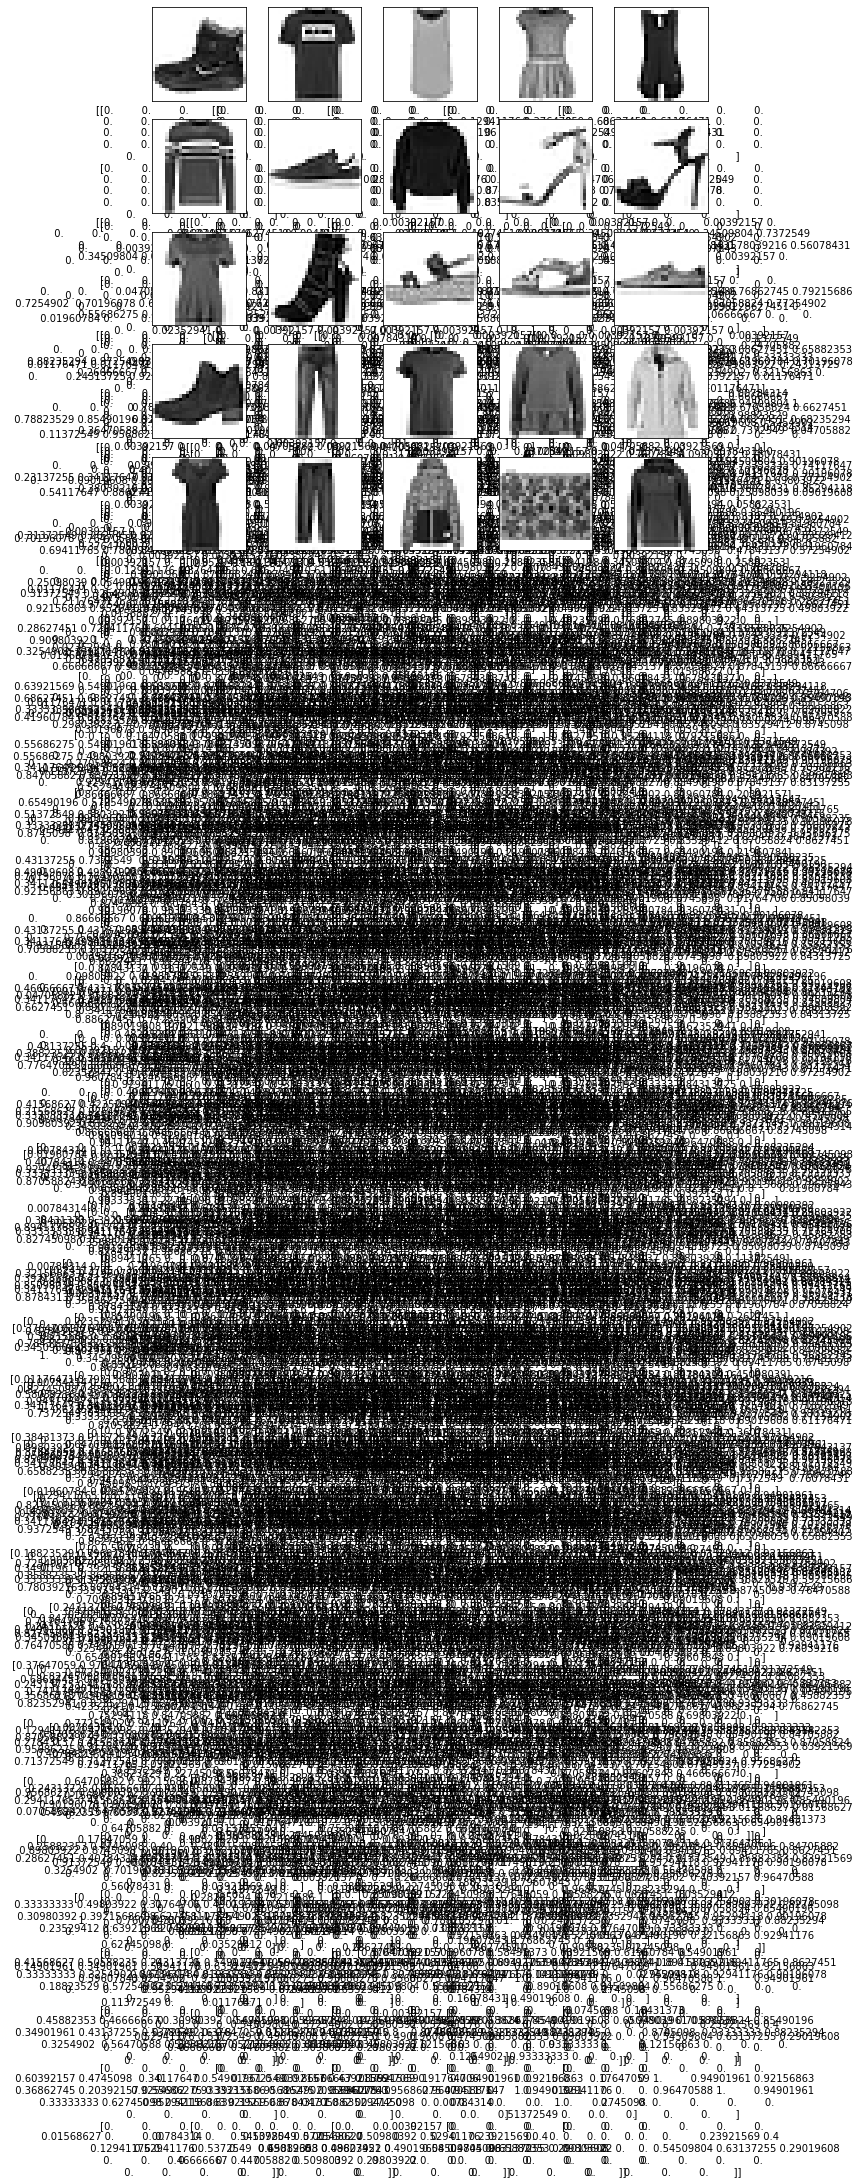

In [ ]:
#Scaling values i.e making them exist between 0 and 1 by dividing them with 255.0 & converting them into float

train_images=train_images/255.0
test_images=test_images/255.0

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i] ,cmap=plt.cm.binary)
  plt.xlabel(train_images[train_labels[i]])
plt.show()


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10))

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

model.fit(train_images, train_labels, epochs= 200)



Epoch 1/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4928 - accuracy: 0.8255
Epoch 2/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3738 - accuracy: 0.8639
Epoch 3/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3363 - accuracy: 0.8770
Epoch 4/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3123 - accuracy: 0.8846
Epoch 5/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2941 - accuracy: 0.8910
Epoch 6/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2824 - accuracy: 0.8950
Epoch 7/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2680 - accuracy: 0.8996
Epoch 8/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2595 - accuracy: 0.9027
Epoch 9/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2489 - accuracy: 0.9071
Epoch 10/200
1875/1875 [==============================] - 4s 2ms/step - l

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 0s - loss: 1.2709 - accuracy: 0.8843


In [ ]:
#Predictions

prob_model=tf.keras.Sequential([model,tf.keras.layers.Softmax()])

predictions=prob_model.predict(test_images)

count=0
for i in range(len(predictions)):
  #print(np.argmax(predictions[i]))
  if(np.argmax(predictions[i])==test_labels[i]):
    count=count+1

print(test_accuracy*100)

88.42999935150146


In [ ]:
temp = test_images[37]

print(temp.shape)

temp= (np.expand_dims(temp,0)) #extends dimension or make a list of image 
print(temp.shape)



(28, 28)
(1, 28, 28)
